- In a way, Reinforcement Learning is the science of making optimal decisions using experiences. 
- It is a paradigm of Learning Process in which a learning agent learns, overtime, to behave optimally in a certain environment by interacting continuously in the environment.
- Breaking it down, the process of Reinforcement Learning involves these simple steps:
    - Observation of the environment
    - Deciding how to act using some strategy
    - Acting accordingly
    - Receiving a reward or penalty
    - Learning from the experiences and refining our strategy
    - Iterate until an optimal strategy is found

- The agent during its course of learning experience various different situations in the environment it is in called states. 
- The agent while being in that state may choose from a set of allowable actions which may fetch different rewards(or penalties). 
- The learning agent overtime learns to maximize these rewards so as to behave optimally at any given state it is in.

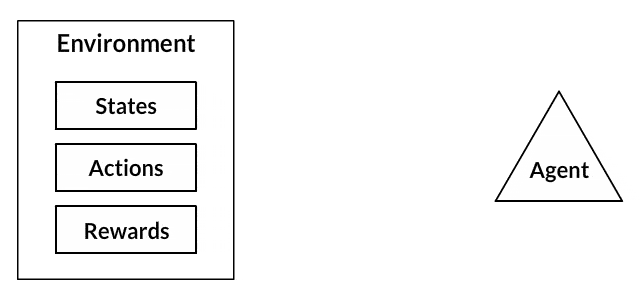

Reinforcement Learning lies between the spectrum of Supervised Learning and Unsupervised Learning, and there's a few important things to note:

- The goal is to not be greedy by looking for the quick immediate rewards, but instead to optimize for maximum rewards over the whole training.
- Sequence matters in Reinforcement Learning i.e the reward agent does not just depend on the current state, but the entire history of states. Unlike supervised and unsupervised learning, time is important here.


# Q Learning
Q-Learning is a basic form of Reinforcement Learning which uses Q-values (also called action values) to iteratively improve the behavior of the learning agent.
Q-learning Definition:
- Q*(s,a) is the expected value (cumulative discounted reward) of doing a in state s and then following the optimal policy.
- Q-learning uses Temporal Differences(TD) to estimate the value of Q*(s,a).
- Temporal difference is an agent learning from an environment through episodes with no prior knowledge of the environment.
- The agent maintains a table of Q[S, A], where S is the set of states and A is the set of actions.
Q[s, a] represents its current estimate of Q*(s,a).
1. Q-Values or Action-Values: Q-values are defined for states and actions. 
    - Q(S, A) is an estimation of how good is it to take the action A at the state S. 
    - This estimation of Q(S, A) will be iteratively computed using the TD- Update rule.
2. Rewards and Episodes: An agent over the course of its lifetime starts from a start state, makes a number of transitions from its current state to a next state based on its choice of action and also the environment the agent is interacting in. At every step of transition, the agent from a state takes an action, observes a reward from the environment, and then transits to another state. If at any point of time the agent ends up in one of the terminating states that means there are no further transition possible. This is said to be the completion of an episode.
3. Temporal Difference or TD-Update: The Temporal Difference or TD-Update rule can be represented as follows :
        Q(state,action)←(1−α)Q(state,action)+α(reward+γmaxaQ(next state,all actions))
 
    Where:
        - α (alpha) is the learning rate (0 < α ≤ 1) - Just like in supervised learning settings, α is the extent to which our Q-values are being updated in every iteration.
        - γ (gamma) is the discount factor (0 ≤ γ ≤ 1) - determines how much importance we want to give to future rewards. A high value for the discount factor (close to 1) captures the long-term effective award, whereas, a discount factor of 0 makes our agent consider only immediate reward, hence making it greedy.
    - This update rule to estimate the value of Q is applied at every time step of the agents interaction with the environment. 
    The terms used are explained below. :
    - S : Current State of the agent.
    - A : Current Action Picked according to some policy.
    - S' : Next State where the agent ends up.
    - A' : Next best action to be picked using current Q-value estimation, i.e. pick the action with the maximum Q-value in the next state.
    - R : Current Reward observed from the environment in Response of current action.

4. Choosing the Action to take using epsilon-greedy(E-greedy) policy:
E-greedy policy is a very simple policy of choosing actions using the current Q-value estimations. It goes as follows :
    - With probability (1 - epsilon) choose the action which has the highest Q-value.
    - With probability (epsilon) choose any action at random.


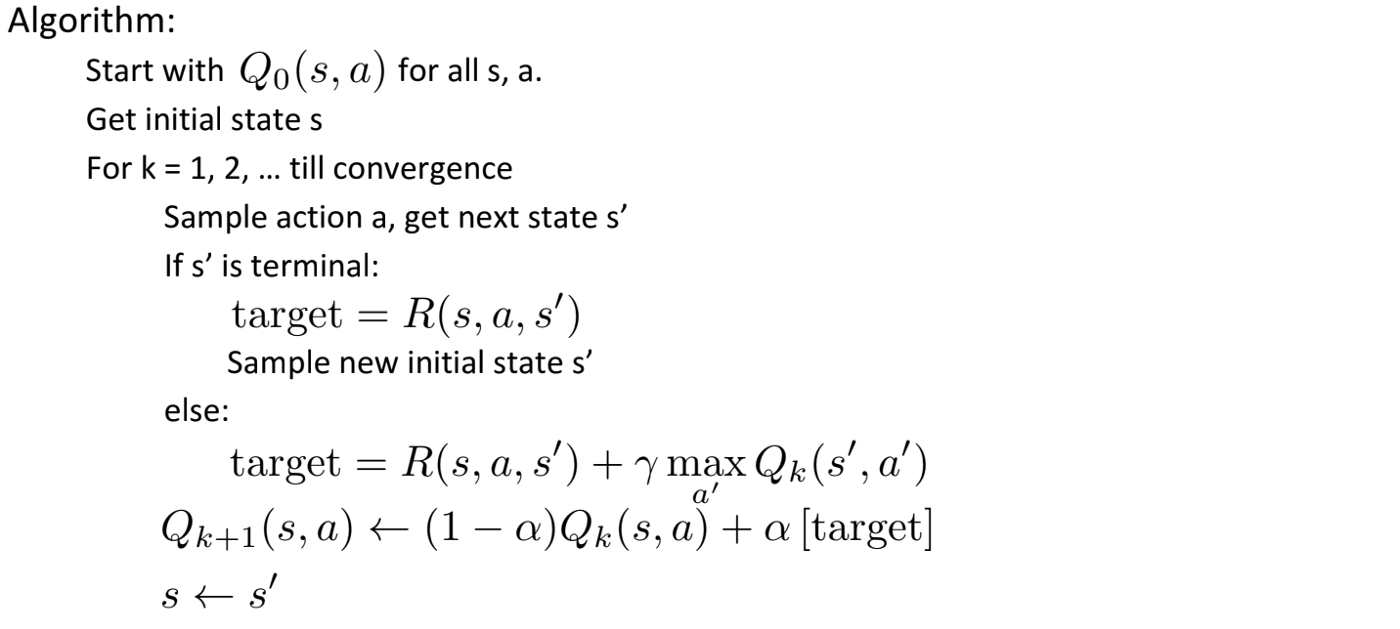

# How Does It Work?
- Following are the steps on how the Q Learning table works:
1. Q matrix is initialized with zeros (agent has just entered the environment)
2. A random action is performed i.e move from current state —-> next state
3. When the state is not a final state;
    1. Perform a random action
    2. Based on the current action go to the next state
    3. Find the maximum Q value.
- We continue this process starting from the current state and move to the next state. And the next state will be our current state and the process continues until we reach the goal.
- The Q-function can be iteratively optimized to reach an optimal Q-value using the Bellman Equations.
- This will be our basic algorithm which works on the principle of awarding the agent for the right move and punishing for the wrong move.



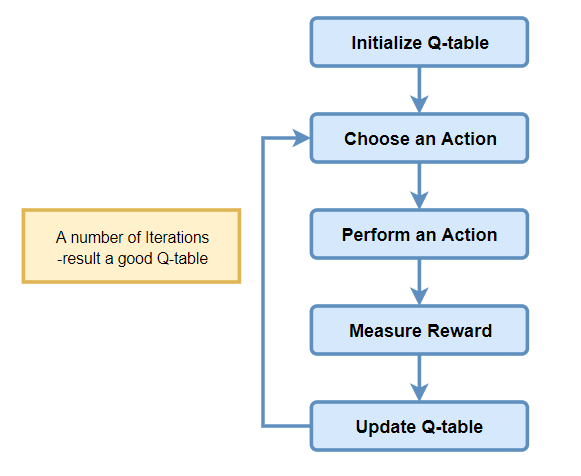

# Implementing the Q-Learning Algorithm
We use OpenAI’s gym environment to train our Q-Learning model.

In [ ]:
import gym 
import itertools 
import matplotlib 
import matplotlib.style 
import numpy as np 
import pandas as pd 
import sys 

from collections import defaultdict 
matplotlib.style.use('ggplot')

Creating Gym Environment

In [ ]:
env = gym.make("FrozenLake-v0")

Creating the Q-table and initialize it
- Q-Table is the data structure used to calculate the maximum expected future rewards for action at each state. 
- Basically, this table will guide us to the best action at each state. 
- The Q-Learning algorithm is used to learn each value of the Q-table.

In [ ]:
action_size = env.action_space.n
state_size = env.observation_space.n

print(f"Action Space : {action_size} | State Space: {state_size}")

Action Space : 4 | State Space: 16


In [ ]:
q_table = np.zeros((state_size, action_size))
q_table.shape

(16, 4)

Step 3: Creating Required Hyperparameters

In [ ]:
total_episodes = 15000        # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.95                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.005            # Exponential decay rate for exploration probability

The Q-Learning Algorithm

In [ ]:
rewards = []                 # List of rewards

#iterate until learning is stopped
for episode in range(0, total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    
    for step in range(max_steps):
        #Choose a random action a in the current state (s)
        exploration_exploitation_tradeoff = random.uniform(0, 1)
        
        # If the random action number is greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exploration_exploitation_tradeoff > epsilon:
            action = np.argmax(q_table[state, :])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # TD Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        q_table[state, action] = q_table[state, action] + learning_rate * (reward + gamma * np.max(q_table[new_state, :]) - q_table[state, action])
        total_rewards += reward
        
        # Our new state becomes the current state
        state = new_state
        
        # If done: finish episode
        if done == True: 
            break
        
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode) 

    rewards.append(total_rewards)

print (f"Score over time: +  {str(sum(rewards)/total_episodes)}")


Score over time: +  0.48846666666666666


In [ ]:
q_table

array([[1.33197922e-01, 1.26204455e-01, 4.99289797e-02, 1.21490012e-01],
       [9.64954788e-02, 9.98637503e-03, 9.04434385e-04, 1.16710618e-01],
       [4.76982874e-02, 4.79793498e-03, 2.03813736e-02, 2.51771138e-02],
       [3.51195173e-04, 3.41201497e-03, 1.80493724e-03, 5.08412808e-02],
       [1.36295166e-01, 5.55050074e-02, 1.00724220e-02, 2.73867795e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.41180652e-03, 2.24696260e-09, 2.54317784e-03, 4.86285469e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.85174700e-02, 5.27111885e-02, 1.13970041e-02, 1.94385196e-01],
       [4.31669108e-02, 1.51195373e-01, 4.58939835e-02, 5.58738909e-03],
       [6.99244059e-01, 1.02810262e-03, 1.95460636e-04, 1.48030235e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.24091417e-02, 2.95769494e-02, 1.48596948e

In [ ]:
for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print(f"EPISODE {episode}")

    for step in range(max_steps):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(q_table[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            
            # We print the number of step it took.
            print("Number of steps", step)
            break
        state = new_state
env.close()

****************************************************
EPISODE 0
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 30
****************************************************
EPISODE 1
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 36
****************************************************
EPISODE 2
  (Left)
SFFF
FHFH
FFFH
HFFG
Number of steps 48
****************************************************
EPISODE 3
  (Down)
SFFF
FHFH
FFFH
HFFG
Number of steps 27
****************************************************
EPISODE 4
